In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:99% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:24pt;}
div.text_cell_render.rendered_html{font-size:20pt;}
div.text_cell_render ul li{font-size:22pt; line-height:30px;}
div.output {font-size:24pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:24pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:24pt;padding:5px;}
table.dataframe{font-size:24px;}
</style>
"""))

# 데이터셋을 라이브러리에서 가져올 예정, 파일에서도 봄

In [5]:
import numpy as np
import pandas as pd
from tensorflow.keras.datasets import mnist # mnist 훈련셋과 테스트셋
from tensorflow.keras.utils import to_categorical # 원핫인코딩
from tensorflow.keras.models import Sequential, save_model, load_model
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.layers import LeakyReLU, ELU, ReLU
from matplotlib import pyplot as plt # 학습과정 시각화
# scale조정, train_test_split 등을 추가

In [6]:
data = np.loadtxt('data/mnist_train_small.csv', delimiter=',', skiprows=1)
data.shape

(100, 785)

In [7]:
print('타겟 :', data[1,0])
#print('이미지(784pixel=28*28) :', data[1, 1:].reshape(28,28))
image = data[1, 1:].reshape(28,28)
image.shape

타겟 : 0.0


(28, 28)

In [8]:
for row in image:
    for pixel in row:
        print("{:3.0f}".format(pixel), end='')
    print()

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 51159253159 50  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0 48238252252252237  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0 54227253252239233252 57  6  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 10 60224252253252202 84252253122  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0163252252252253252252 96189253167  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0 51238253253190114253228 47 79255168  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 48238252252179 12 75121 21  0  0253243 50  0  0  0  0  0
  0  0  0  0  0  0  0  0 38165253233208 84  0  0  0  0  0  025325

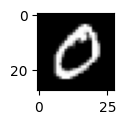

In [9]:
plt.figure(figsize=(1,1))
plt.imshow(image, cmap='gray')

In [10]:
# 칼라사진 -> 흑백모드로 넘파이 배열로 읽기

In [11]:
%pip install opencv-python==4.8.1.78

   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   --------- ------------------------------ 8.9/38.1 MB 55.5 MB/s eta 0:00:01
   ---------------------- ----------------- 21.8/38.1 MB 57.3 MB/s eta 0:00:01
   ----------------------------------- ---- 33.8/38.1 MB 56.5 MB/s eta 0:00:01
   ---------------------------------------- 38.1/38.1 MB 49.4 MB/s  0:00:00
Note: you may need to restart the kernel to use updated packages.


In [14]:
import cv2
# 사진이미지를 흑백포맷으로 넘파이 배열로 읽어오기
image_gray = cv2.imread('data/sample.jpg', cv2.IMREAD_GRAYSCALE)
image_gray.shape

(408, 612)

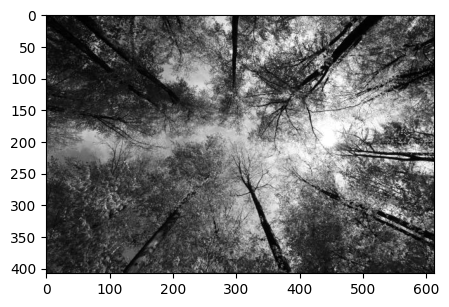

In [15]:
plt.figure(figsize=(5,5))
plt.imshow(image_gray, cmap='gray')

# 1. 데이터 생성 및 전처리

In [17]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

11490434/11490434 [==============================] - 1s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

2


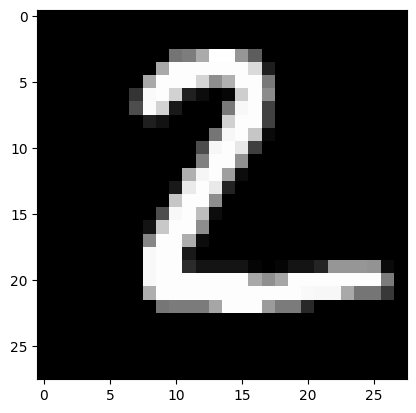

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0116125171255255150 93  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0169253253253253253253218 30  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0169253253253213142176253253122  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0 52250253210 32 12  0  6206253140  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0 77251210 25  0  0  0122248253 65  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 31 18  0  0  0  0209253253 65  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0117247253198 10  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0 76247253231 63  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0128253253144  0  0  0  0  0  

In [18]:
print(y_test[1])
plt.imshow(X_test[1], cmap='gray')
plt.show()
for row in X_test[1]:
    for pixel in row:
        print("{:3.0f}".format(pixel), end='')
    print()


In [19]:
# Train데이터 6만개 => Train(5만개) + val(만개)로 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]

In [20]:
print('학습셋 :', X_train.shape, y_train.shape)
print('검증셋 :', X_val.shape, y_val.shape)
print('시험셋 :', X_test.shape, y_test.shape)

학습셋 : (50000, 28, 28) (50000,)
검증셋 : (10000, 28, 28) (10000,)
시험셋 : (10000, 28, 28) (10000,)


In [23]:
# 입력(독립) 변수 (n, 28, 28) -> (n, 28*28) -> 실수형변환 -> 스케일조정(/255.0)
train_X = X_train.reshape(50000, 28*28).astype('float32')/255.0
val_X   = X_val.reshape(-1, 784).astype('float32')/255.0
test_X  = X_test.reshape(10000, -1).astype('float32')/255.0
train_X.shape, val_X.shape, test_X.shape

((50000, 784), (10000, 784), (10000, 784))

In [25]:
# 분류분석을 위한 타겟변수의 원핫인코딩
# print(y_train[0])
# to_categorical(y_train)[0]
train_Y = to_categorical(y_train, 10) # 10:카테고리수(안쓰면 자동 입력)
val_Y   = to_categorical(y_val)
test_Y  = to_categorical(y_test)
train_Y.shape, val_Y.shape, test_Y.shape

((50000, 10), (10000, 10), (10000, 10))

In [26]:
# Train 5만->700개, Val만->300개 (목적:수업시간 중 fit시간 절약)
train_idx = np.random.choice(50000, 7) # 0~50000미만의 수 700개 뽑기
train_idx

array([41837, 15772,  6361, 32061,  4203, 10842, 25419])

In [27]:
train_X.shape, train_Y.shape, val_X.shape, val_Y.shape, test_X.shape, test_Y.shape

((50000, 784),
 (50000, 10),
 (10000, 784),
 (10000, 10),
 (10000, 784),
 (10000, 10))

# 2. 모델 구성

In [29]:
model=Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2)) # activation='Leakeyrelu' 사용불가
# model.add(ReLU())
model.add(LeakyReLU(alpha=0.01)) # 음수 결과에 대해 1%만 통과
model.add(Dense(units=10,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 1570      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 2)                 0         
                                                                 
 dense_1 (Dense)             (None, 10)                30        
                                                                 
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________


# 3. 학습과정 설정

In [33]:
model.compile(loss='categorical_crossentropy', # sparse_categorical_crossentropy
             optimizer='adam',
             metrics=['accuracy'])# 평가지표

# 4. 모델 학습

In [34]:
%%time
hist = model.fit(train_X, train_Y, # 학습셋
                epochs=200,
                batch_size=100,
                validation_data=(val_X, val_Y),
                verbose=1)

Epoch 1/200
500/500 [==============================] - 1s 2ms/step - loss: 1.8367 - accuracy: 0.3203 - val_loss: 1.5969 - val_accuracy: 0.3838
Epoch 2/200
500/500 [==============================] - 1s 1ms/step - loss: 1.5443 - accuracy: 0.4076 - val_loss: 1.4470 - val_accuracy: 0.4452
Epoch 3/200
500/500 [==============================] - 1s 1ms/step - loss: 1.4197 - accuracy: 0.4584 - val_loss: 1.3390 - val_accuracy: 0.4852
Epoch 4/200
500/500 [==============================] - 1s 1ms/step - loss: 1.3224 - accuracy: 0.4955 - val_loss: 1.2599 - val_accuracy: 0.5177
Epoch 5/200
500/500 [==============================] - 1s 1ms/step - loss: 1.2514 - accuracy: 0.5229 - val_loss: 1.1970 - val_accuracy: 0.5405
Epoch 6/200
500/500 [==============================] - 1s 1ms/step - loss: 1.2042 - accuracy: 0.5412 - val_loss: 1.1643 - val_accuracy: 0.5536
Epoch 7/200
500/500 [==============================] - 1s 1ms/step - loss: 1.1707 - accuracy: 0.5595 - val_loss: 1.1324 - val_accuracy: 0.5727

Epoch 58/200
500/500 [==============================] - 1s 1ms/step - loss: 0.9769 - accuracy: 0.6844 - val_loss: 0.9512 - val_accuracy: 0.6955
Epoch 59/200
500/500 [==============================] - 1s 1ms/step - loss: 0.9767 - accuracy: 0.6835 - val_loss: 0.9492 - val_accuracy: 0.6982
Epoch 60/200
500/500 [==============================] - 1s 1ms/step - loss: 0.9749 - accuracy: 0.6857 - val_loss: 0.9489 - val_accuracy: 0.6975
Epoch 61/200
500/500 [==============================] - 1s 1ms/step - loss: 0.9746 - accuracy: 0.6845 - val_loss: 0.9501 - val_accuracy: 0.6959
Epoch 62/200
500/500 [==============================] - 1s 1ms/step - loss: 0.9741 - accuracy: 0.6840 - val_loss: 0.9481 - val_accuracy: 0.6965
Epoch 63/200
500/500 [==============================] - 1s 1ms/step - loss: 0.9747 - accuracy: 0.6842 - val_loss: 0.9516 - val_accuracy: 0.6966
Epoch 64/200
500/500 [==============================] - 1s 1ms/step - loss: 0.9742 - accuracy: 0.6850 - val_loss: 0.9494 - val_accuracy:

Epoch 115/200
500/500 [==============================] - 1s 1ms/step - loss: 0.9664 - accuracy: 0.6874 - val_loss: 0.9422 - val_accuracy: 0.7022
Epoch 116/200
500/500 [==============================] - 1s 1ms/step - loss: 0.9663 - accuracy: 0.6882 - val_loss: 0.9432 - val_accuracy: 0.7045
Epoch 117/200
500/500 [==============================] - 1s 1ms/step - loss: 0.9656 - accuracy: 0.6877 - val_loss: 0.9429 - val_accuracy: 0.7000
Epoch 118/200
500/500 [==============================] - 1s 1ms/step - loss: 0.9663 - accuracy: 0.6881 - val_loss: 0.9460 - val_accuracy: 0.7005
Epoch 119/200
500/500 [==============================] - 1s 1ms/step - loss: 0.9660 - accuracy: 0.6874 - val_loss: 0.9435 - val_accuracy: 0.7021
Epoch 120/200
500/500 [==============================] - 1s 1ms/step - loss: 0.9663 - accuracy: 0.6879 - val_loss: 0.9430 - val_accuracy: 0.7015
Epoch 121/200
500/500 [==============================] - 1s 1ms/step - loss: 0.9660 - accuracy: 0.6872 - val_loss: 0.9486 - val_ac

500/500 [==============================] - 1s 1ms/step - loss: 0.9632 - accuracy: 0.6887 - val_loss: 0.9494 - val_accuracy: 0.6995
Epoch 172/200
500/500 [==============================] - 1s 1ms/step - loss: 0.9634 - accuracy: 0.6889 - val_loss: 0.9426 - val_accuracy: 0.7034
Epoch 173/200
500/500 [==============================] - 1s 1ms/step - loss: 0.9635 - accuracy: 0.6892 - val_loss: 0.9419 - val_accuracy: 0.7025
Epoch 174/200
500/500 [==============================] - 1s 1ms/step - loss: 0.9629 - accuracy: 0.6894 - val_loss: 0.9429 - val_accuracy: 0.6999
Epoch 175/200
500/500 [==============================] - 1s 1ms/step - loss: 0.9630 - accuracy: 0.6891 - val_loss: 0.9436 - val_accuracy: 0.7005
Epoch 176/200
500/500 [==============================] - 1s 1ms/step - loss: 0.9633 - accuracy: 0.6900 - val_loss: 0.9462 - val_accuracy: 0.7014
Epoch 177/200
500/500 [==============================] - 1s 1ms/step - loss: 0.9637 - accuracy: 0.6903 - val_loss: 0.9418 - val_accuracy: 0.7023

# 5. 모델 평가하기

In [35]:
hist.history.keys

<function dict.keys>

In [36]:
# 모델 평가(테스트셋)
loss_metrics=model.evaluate(test_X, test_Y, batch_size=100, verbose=0)
print('loss:',loss_metrics[0])
print('accuracy:',loss_metrics[1])

loss: 0.9754700064659119
accuracy: 0.6927000284194946


# ☞ 위 모델(DNN)의 ACCURACY 늘리기
- 데이터를 더 많이 확보
- 모델 수정(레이어 추가, units 수 증가)
- 과적합 방지(validation data 추가, 활성화 함수 relu 계열, tanh, dropout)
- epoch 조정
- optimizer 변경
-

In [37]:
%%time
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# Train데이터 6만개 => Train(5만개) + val(만개)로 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]
# 입력(독립) 변수 (n, 28, 28) -> (n, 28*28) -> 실수형변환 -> 스케일조정(/255.0)
train_X = X_train.reshape(50000, 28*28).astype('float32')/255.0
val_X   = X_val.reshape(-1, 784).astype('float32')/255.0
test_X  = X_test.reshape(10000, -1).astype('float32')/255.0
# 분류분석을 위한 타겟변수의 원핫인코딩
# print(y_train[0])
# to_categorical(y_train)[0]
train_Y = to_categorical(y_train, 10) # 10:카테고리수(안쓰면 자동 입력)
val_Y   = to_categorical(y_val)
test_Y  = to_categorical(y_test)
# Train 5만->700개, Val만->300개 (목적:수업시간 중 fit시간 절약)
# train_idx = np.random.choice(50000, 700) # 0~50000미만의 수 700개 비복원추출
# val_idx   = np.random.choice(10000, 300)
# train_X = train_X[train_idx]
# train_Y = train_Y[train_idx]
# val_X   = val_X[val_idx]
# val_Y   = val_Y[val_idx]
# 모델
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2)) # activation='leakeyrelu' 사용불가
# model.add(ReLU())
model.add(LeakyReLU(alpha=0.01)) # 음수결과에 대해 1%만 통과
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', # sparse_categorical_crossentropy
             optimizer='adam',
             metrics=['accuracy'])# 평가지표

hist = model.fit(train_X, train_Y, # 학습셋
                epochs=200,
                batch_size=100,
                validation_data=(val_X, val_Y),
                verbose=0)

CPU times: total: 4min 10s
Wall time: 2min 25s


In [38]:
model.evaluate(test_X, test_Y)

313/313 [==============================] - 0s 948us/step - loss: 0.9479 - accuracy: 0.6979


[0.9478920102119446, 0.6978999972343445]

In [ ]:
# 연습문제

In [39]:
%%time
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Train데이터 6만개 => Train(5만개) + val(만개)로 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]

# 입력(독립) 변수 (n, 28, 28) -> (n, 28*28) -> 실수형변환 -> 스케일조정(/255.0)
train_X = X_train.reshape(50000, 28*28).astype('float32')/255.0
val_X   = X_val.reshape(-1, 784).astype('float32')/255.0
test_X  = X_test.reshape(10000, -1).astype('float32')/255.0

# 분류분석을 위한 타겟변수의 원핫인코딩
train_Y = to_categorical(y_train, 10)
val_Y   = to_categorical(y_val)
test_Y  = to_categorical(y_test)

# 모델 (첨부 파일 기반 수정)
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=128))  # ← 2에서 128로 변경 (은닉층 강화)
model.add(LeakyReLU(alpha=0.01))  # ← 음수값 1% 통과
model.add(Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

# 학습 (에포크 20회로 조정)
hist = model.fit(train_X, train_Y,
                epochs=20,  # ← 200에서 20으로 변경
                batch_size=100,
                validation_data=(val_X, val_Y),
                verbose=1)  # ← 진행 상황 표시

# 테스트 정확도 확인
test_loss, test_acc = model.evaluate(test_X, test_Y, verbose=0)
print(f"\n테스트 정확도: {test_acc:.4f} ({test_acc*100:.2f}%)")

Epoch 1/20
500/500 [==============================] - 1s 2ms/step - loss: 0.3612 - accuracy: 0.9002 - val_loss: 0.1959 - val_accuracy: 0.9452
Epoch 2/20
500/500 [==============================] - 1s 2ms/step - loss: 0.1701 - accuracy: 0.9509 - val_loss: 0.1377 - val_accuracy: 0.9625
Epoch 3/20
500/500 [==============================] - 1s 2ms/step - loss: 0.1211 - accuracy: 0.9648 - val_loss: 0.1112 - val_accuracy: 0.9678
Epoch 4/20
500/500 [==============================] - 1s 2ms/step - loss: 0.0926 - accuracy: 0.9731 - val_loss: 0.0989 - val_accuracy: 0.9722
Epoch 5/20
500/500 [==============================] - 1s 2ms/step - loss: 0.0733 - accuracy: 0.9791 - val_loss: 0.0955 - val_accuracy: 0.9723
Epoch 6/20
500/500 [==============================] - 1s 2ms/step - loss: 0.0599 - accuracy: 0.9827 - val_loss: 0.0862 - val_accuracy: 0.9743
Epoch 7/20
500/500 [==============================] - 1s 2ms/step - loss: 0.0499 - accuracy: 0.9862 - val_loss: 0.0807 - val_accuracy: 0.9761
Epoch 

In [40]:
# 수정 전과 수정 후
| 항목       | 수정 전          | 수정 후            | 변경 이유                               |
| -------- | ------------- | --------------- | ----------------------------------- |
| 은닉층 유닛 수 | `units=2`     | `units=128`     | 표현력 부족 해결 (2개 유닛으로는 10개 클래스 구분 불가 능) |
| 에포크 수    | 200회          | 20회             | 첨부 파일의 20회 반영, 과적합 방지               |
| verbose  | 0             | 1               | 학습 진행 상황 실시간 확인                     |
| 활성화 함수   | Dense 내 지정 불가 | 별도 LeakyReLU 계층 | LeakyReLU는 별도 계층으로 추가해야 정상 작동       |


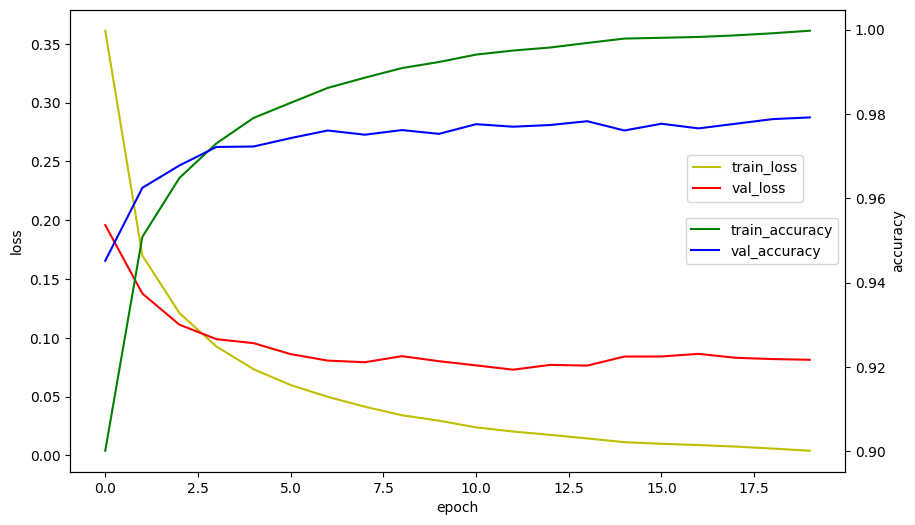

In [41]:
# 학습과정 표시하기
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots(figsize=(10,6))
loss_ax.plot(hist.history['loss'], 'y', label='train_loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val_loss')
acc_ax = loss_ax.twinx() # loss_ax와 x축을 공유하는 acc_ax 생성
acc_ax.plot(hist.history['accuracy'], 'g', label='train_accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val_accuracy')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(bbox_to_anchor=(0.955, 0.7))
acc_ax.legend(loc='center right')
plt.show()


In [42]:
# 모델 평가(테스트셋)
loss_metrics = model.evaluate(test_X, test_Y, batch_size=100, verbose=0)
print('loss :', loss_metrics[0])
print('accuracy :', loss_metrics[1])

loss : 0.07790113240480423
accuracy : 0.9783999919891357


In [58]:
%%time
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# Train데이터 6만개 => Train(5만개) + val(만개)로 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]
# 입력(독립) 변수 (n, 28, 28) -> (n, 28*28) -> 실수형변환 -> 스케일조정(/255.0)
train_X = X_train.reshape(50000, 28*28).astype('float32')/255.0
val_X   = X_val.reshape(-1, 784).astype('float32')/255.0
test_X  = X_test.reshape(10000, -1).astype('float32')/255.0
# 분류분석을 위한 타겟변수의 원핫인코딩
# print(y_train[0])
# to_categorical(y_train)[0]
train_Y = to_categorical(y_train, 10) # 10:카테고리수(안쓰면 자동 입력)
val_Y   = to_categorical(y_val)
test_Y  = to_categorical(y_test)
# Train 5만->700개, Val만->300개 (목적:수업시간 중 fit시간 절약)
# train_idx = np.random.choice(50000, 700) # 0~50000미만의 수 700개 비복원추출
# val_idx   = np.random.choice(10000, 300)
# train_X = train_X[train_idx]
# train_Y = train_Y[train_idx]
# val_X   = val_X[val_idx]
# val_Y   = val_Y[val_idx]
# 모델
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=1024, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=128))
model.add(LeakyReLU(alpha=0.01)) # 음수결과에 대해 1%만 통과
model.add(Dropout(0.3))
model.add(Dense(units=10, activation='softmax'))
print(model.summary())
model.compile(loss='categorical_crossentropy', # sparse_categorical_crossentropy
             optimizer='adam',
             metrics=['accuracy'])# 평가지표

hist = model.fit(train_X, train_Y, # 학습셋
                epochs=20,
                batch_size=100,
                validation_data=(val_X, val_Y),
                verbose=1)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 1024)              803840    
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_9 (Dense)             (None, 512)               524800    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               65664     
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 128)               0         
                                                                 
 dropout_2 (Dropout)         (None, 128)              

In [60]:
# 이소영 강사님 자료
model.evaluate(test_X, test_Y)

313/313 [==============================] - 1s 3ms/step - loss: 0.0883 - accuracy: 0.9811


[0.08832086622714996, 0.9811000227928162]

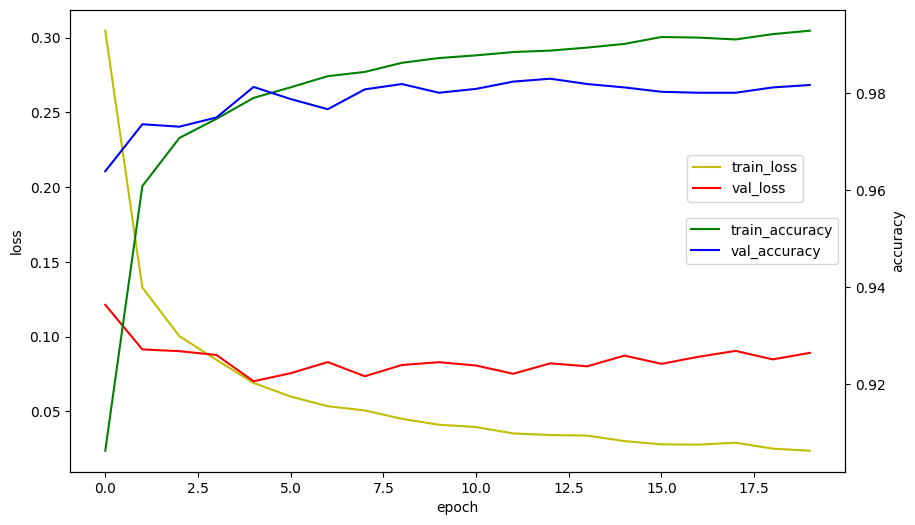

In [61]:
# 모델 평가
# 학습과정 표시하기
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots(figsize=(10,6))
loss_ax.plot(hist.history['loss'], 'y', label='train_loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val_loss')
acc_ax = loss_ax.twinx() # loss_ax와 x축을 공유하는 acc_ax 생성
acc_ax.plot(hist.history['accuracy'], 'g', label='train_accuracy')
acc_ax.plot(hist.history['val_accuracy'], 'b', label='val_accuracy')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(bbox_to_anchor=(0.955, 0.7))
acc_ax.legend(loc='center right')
plt.show()


In [68]:
# 모델 평가
score = model.evaluate(test_X, test_Y)
score[1]

313/313 [==============================] - 1s 3ms/step - loss: 0.0883 - accuracy: 0.9811


0.9811000227928162

In [63]:
# 교차표
np.all(test_Y.argmax(axis=1) == y_test) # 실제값(y_test)

True

In [64]:
# model.predict(test_X).argmax(axis=1)
y_hat = np.argmax(model.predict(test_X), axis=1) # 예측값

313/313 [==============================] - 1s 3ms/step


In [65]:
pd.crosstab(y_test, y_hat, rownames=['실제값'], colnames=['예측값'])

예측값,0,1,2,3,4,5,6,7,8,9
실제값,,,,,,,,,,
0,972,1,1,0,1,2,1,1,1,0
1,0,1122,4,0,0,1,5,0,3,0
2,3,0,1019,2,0,0,1,4,3,0
3,2,0,6,983,0,3,0,5,5,6
4,2,0,1,1,953,0,6,3,0,16
5,2,0,0,7,1,873,4,0,3,2
6,3,2,0,0,3,3,947,0,0,0
7,2,1,13,0,0,0,0,1006,3,3
8,4,0,4,1,2,4,0,3,954,2


In [69]:
# 틀린 갯수
10000-10000*score[1]

188.99977207183838

# ※ 콜백 함수 1: 로그 출력

In [52]:
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint

In [67]:
%%time
# 특정 에포크마다 로그출력하도록 제한
class CustomHistory(Callback):
    def __init__(self, age): # 생성자 함수
        self.eopch=0
        
    def on_epoch_end(self,batch,logs={}):
        '1 epoch마다 자동 실행되는 함수'
        self.eopch=0
        if self.epoch&10=0
customHistory=CustomHistory()        
        
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# Train데이터 6만개 => Train(5만개) + val(만개)로 분리
X_val = X_train[50000:]
y_val = y_train[50000:]
X_train = X_train[:50000]
y_train = y_train[:50000]
# 입력(독립) 변수 (n, 28, 28) -> (n, 28*28) -> 실수형변환 -> 스케일조정(/255.0)
train_X = X_train.reshape(50000, 28*28).astype('float32')/255.0
val_X   = X_val.reshape(-1, 784).astype('float32')/255.0
test_X  = X_test.reshape(10000, -1).astype('float32')/255.0
# 분류분석을 위한 타겟변수의 원핫인코딩
# print(y_train[0])
# to_categorical(y_train)[0]
train_Y = to_categorical(y_train, 10) # 10:카테고리수(안쓰면 자동 입력)
val_Y   = to_categorical(y_val)
test_Y  = to_categorical(y_test)
# Train 5만->700개, Val만->300개 (목적:수업시간 중 fit시간 절약)
train_idx = np.random.choice(50000, 700) # 0~50000미만의 수 700개 비복원추출
val_idx   = np.random.choice(10000, 300)
train_X = train_X[train_idx]
train_Y = train_Y[train_idx]
val_X   = val_X[val_idx]
val_Y   = val_Y[val_idx]
# 모델
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy', # sparse_categorical_crossentropy
             optimizer='adam',
             metrics=['accuracy'])# 평가지표
hist = model.fit(train_X, train_Y, # 학습셋
                epochs=20,
                batch_size=100,
                validation_data=(val_X, val_Y),
                verbose=0)
                


SyntaxError: cannot assign to expression here. Maybe you meant '==' instead of '='? (<unknown>, line 9)

# ※ 콜백함수2 : EarlyStopping
- val_loss값이 늘어나면 지정한 epoch를 다 수행하지 않고 조기 종료
- val_accuracy값이 감소하면 지정한 epoch를 다 수행하지 않고 조기 종료

In [ ]:
# 모델
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy', # sparse_categorical_crossentropy
             optimizer='adam',
             metrics=['accuracy'])# 평가지표

# monitor 기준으로 patience번 이상 안 좋은 데이터가 나오면 조기 종료
earlyStopping = EarlyStopping(monitor='val_accuracy', patience=3)

hist = model.fit(train_X, train_Y, # 학습셋
                epochs=500,
                batch_size=100,
                validation_data=(val_X, val_Y),
                verbose=1,
                callbacks=[earlyStopping]) # 콜백함수

# ※ 콜백 함수 3: ModelChectpoint
- - epoch마다 val_accuracy(val_loss, accuracy, loss)값이 좋을 때 모델을 자동 저장하는 콜백

In [55]:
# 모델
model = Sequential()
model.add(Input(shape=(784,)))
model.add(Dense(units=2, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy', # sparse_categorical_crossentropy
             optimizer='adam',
             metrics=['accuracy'])# 평가지표
# 모델 자동 자정 콜백
import os
model_save_folder = './model08/'
if not os.path.exists(model_save_folder): # 폴더가 없으면 폴더 생성
    os.mkdir(model_save_folder)
file = model_save_folder + 'mnist-{epoch:03d}'
checkpoint = ModelCheckpoint(
               filepath= file,
               monitor='val_accuracy', # 모니터할 지표(기본값 val_loss)
               save_bost_only=True, # 모니터링 지표가 개선된 경우만 저장
               mode='max', #값이 클수록 저장
               verbose=1
)

hist = model.fit(train_X, train_Y, # 학습셋
                epochs=200,
                batch_size=100,
                validation_data=(val_X, val_Y),
                verbose=1,
                callbacks=[checkpoint]) # 콜백함수

Epoch 1/200
482/500 [===========================>..] - ETA: 0s - loss: 2.0180 - accuracy: 0.2149
Epoch 1: saving model to ./model08\mnist-001
INFO:tensorflow:Assets written to: ./model08\mnist-001\assets
500/500 [==============================] - 2s 4ms/step - loss: 2.0078 - accuracy: 0.2202 - val_loss: 1.6830 - val_accuracy: 0.4004
Epoch 2/200
486/500 [============================>.] - ETA: 0s - loss: 1.5540 - accuracy: 0.4418
Epoch 2: saving model to ./model08\mnist-002
INFO:tensorflow:Assets written to: ./model08\mnist-002\assets
500/500 [==============================] - 1s 2ms/step - loss: 1.5504 - accuracy: 0.4422 - val_loss: 1.4144 - val_accuracy: 0.4880
Epoch 3/200
470/500 [===========================>..] - ETA: 0s - loss: 1.3619 - accuracy: 0.4988
Epoch 3: saving model to ./model08\mnist-003
INFO:tensorflow:Assets written to: ./model08\mnist-003\assets
500/500 [==============================] - 1s 2ms/step - loss: 1.3599 - accuracy: 0.4987 - val_loss: 1.2728 - val_accuracy: 0.

INFO:tensorflow:Assets written to: ./model08\mnist-025\assets
500/500 [==============================] - 1s 2ms/step - loss: 0.9877 - accuracy: 0.6753 - val_loss: 0.9522 - val_accuracy: 0.6846
Epoch 26/200
495/500 [============================>.] - ETA: 0s - loss: 0.9863 - accuracy: 0.6757
Epoch 26: saving model to ./model08\mnist-026
INFO:tensorflow:Assets written to: ./model08\mnist-026\assets
500/500 [==============================] - 1s 2ms/step - loss: 0.9871 - accuracy: 0.6758 - val_loss: 0.9534 - val_accuracy: 0.6813
Epoch 27/200
479/500 [===========================>..] - ETA: 0s - loss: 0.9853 - accuracy: 0.6765
Epoch 27: saving model to ./model08\mnist-027
INFO:tensorflow:Assets written to: ./model08\mnist-027\assets
500/500 [==============================] - 1s 2ms/step - loss: 0.9860 - accuracy: 0.6762 - val_loss: 0.9504 - val_accuracy: 0.6875
Epoch 28/200
463/500 [==========================>...] - ETA: 0s - loss: 0.9874 - accuracy: 0.6749
Epoch 28: saving model to ./model08

Epoch 50/200
466/500 [==========================>...] - ETA: 0s - loss: 0.9765 - accuracy: 0.6747
Epoch 50: saving model to ./model08\mnist-050
INFO:tensorflow:Assets written to: ./model08\mnist-050\assets
500/500 [==============================] - 1s 2ms/step - loss: 0.9764 - accuracy: 0.6761 - val_loss: 0.9420 - val_accuracy: 0.6887
Epoch 51/200
479/500 [===========================>..] - ETA: 0s - loss: 0.9764 - accuracy: 0.6773
Epoch 51: saving model to ./model08\mnist-051
INFO:tensorflow:Assets written to: ./model08\mnist-051\assets
500/500 [==============================] - 1s 2ms/step - loss: 0.9764 - accuracy: 0.6764 - val_loss: 0.9419 - val_accuracy: 0.6862
Epoch 52/200
499/500 [============================>.] - ETA: 0s - loss: 0.9758 - accuracy: 0.6766
Epoch 52: saving model to ./model08\mnist-052
INFO:tensorflow:Assets written to: ./model08\mnist-052\assets
500/500 [==============================] - 1s 2ms/step - loss: 0.9756 - accuracy: 0.6766 - val_loss: 0.9462 - val_accura

INFO:tensorflow:Assets written to: ./model08\mnist-074\assets
500/500 [==============================] - 1s 2ms/step - loss: 0.9724 - accuracy: 0.6785 - val_loss: 0.9450 - val_accuracy: 0.6890
Epoch 75/200
465/500 [==========================>...] - ETA: 0s - loss: 0.9728 - accuracy: 0.6765
Epoch 75: saving model to ./model08\mnist-075
INFO:tensorflow:Assets written to: ./model08\mnist-075\assets
500/500 [==============================] - 1s 2ms/step - loss: 0.9729 - accuracy: 0.6768 - val_loss: 0.9452 - val_accuracy: 0.6847
Epoch 76/200
472/500 [===========================>..] - ETA: 0s - loss: 0.9745 - accuracy: 0.6764
Epoch 76: saving model to ./model08\mnist-076
INFO:tensorflow:Assets written to: ./model08\mnist-076\assets
500/500 [==============================] - 1s 3ms/step - loss: 0.9722 - accuracy: 0.6770 - val_loss: 0.9422 - val_accuracy: 0.6862
Epoch 77/200
474/500 [===========================>..] - ETA: 0s - loss: 0.9729 - accuracy: 0.6786
Epoch 77: saving model to ./model08

Epoch 99/200
473/500 [===========================>..] - ETA: 0s - loss: 0.9687 - accuracy: 0.6785
Epoch 99: saving model to ./model08\mnist-099
INFO:tensorflow:Assets written to: ./model08\mnist-099\assets
500/500 [==============================] - 1s 2ms/step - loss: 0.9709 - accuracy: 0.6781 - val_loss: 0.9388 - val_accuracy: 0.6915
Epoch 100/200
483/500 [===========================>..] - ETA: 0s - loss: 0.9695 - accuracy: 0.6780
Epoch 100: saving model to ./model08\mnist-100
INFO:tensorflow:Assets written to: ./model08\mnist-100\assets
500/500 [==============================] - 1s 2ms/step - loss: 0.9706 - accuracy: 0.6776 - val_loss: 0.9406 - val_accuracy: 0.6890
Epoch 101/200
464/500 [==========================>...] - ETA: 0s - loss: 0.9723 - accuracy: 0.6781
Epoch 101: saving model to ./model08\mnist-101
INFO:tensorflow:Assets written to: ./model08\mnist-101\assets
500/500 [==============================] - 1s 3ms/step - loss: 0.9703 - accuracy: 0.6782 - val_loss: 0.9422 - val_ac

464/500 [==========================>...] - ETA: 0s - loss: 0.9723 - accuracy: 0.6779
Epoch 123: saving model to ./model08\mnist-123
INFO:tensorflow:Assets written to: ./model08\mnist-123\assets
500/500 [==============================] - 1s 2ms/step - loss: 0.9696 - accuracy: 0.6785 - val_loss: 0.9381 - val_accuracy: 0.6867
Epoch 124/200
469/500 [===========================>..] - ETA: 0s - loss: 0.9717 - accuracy: 0.6788
Epoch 124: saving model to ./model08\mnist-124
INFO:tensorflow:Assets written to: ./model08\mnist-124\assets
500/500 [==============================] - 1s 2ms/step - loss: 0.9690 - accuracy: 0.6795 - val_loss: 0.9374 - val_accuracy: 0.6877
Epoch 125/200
482/500 [===========================>..] - ETA: 0s - loss: 0.9695 - accuracy: 0.6777
Epoch 125: saving model to ./model08\mnist-125
INFO:tensorflow:Assets written to: ./model08\mnist-125\assets
500/500 [==============================] - 1s 2ms/step - loss: 0.9694 - accuracy: 0.6775 - val_loss: 0.9382 - val_accuracy: 0.68

460/500 [==========================>...] - ETA: 0s - loss: 0.9683 - accuracy: 0.6795
Epoch 147: saving model to ./model08\mnist-147
INFO:tensorflow:Assets written to: ./model08\mnist-147\assets
500/500 [==============================] - 1s 2ms/step - loss: 0.9685 - accuracy: 0.6797 - val_loss: 0.9370 - val_accuracy: 0.6904
Epoch 148/200
470/500 [===========================>..] - ETA: 0s - loss: 0.9683 - accuracy: 0.6793
Epoch 148: saving model to ./model08\mnist-148
INFO:tensorflow:Assets written to: ./model08\mnist-148\assets
500/500 [==============================] - 1s 2ms/step - loss: 0.9691 - accuracy: 0.6790 - val_loss: 0.9380 - val_accuracy: 0.6907
Epoch 149/200
466/500 [==========================>...] - ETA: 0s - loss: 0.9695 - accuracy: 0.6786
Epoch 149: saving model to ./model08\mnist-149
INFO:tensorflow:Assets written to: ./model08\mnist-149\assets
500/500 [==============================] - 1s 2ms/step - loss: 0.9684 - accuracy: 0.6793 - val_loss: 0.9385 - val_accuracy: 0.69

499/500 [============================>.] - ETA: 0s - loss: 0.9685 - accuracy: 0.6802
Epoch 171: saving model to ./model08\mnist-171
INFO:tensorflow:Assets written to: ./model08\mnist-171\assets
500/500 [==============================] - 1s 2ms/step - loss: 0.9682 - accuracy: 0.6802 - val_loss: 0.9383 - val_accuracy: 0.6881
Epoch 172/200
499/500 [============================>.] - ETA: 0s - loss: 0.9678 - accuracy: 0.6800
Epoch 172: saving model to ./model08\mnist-172
INFO:tensorflow:Assets written to: ./model08\mnist-172\assets
500/500 [==============================] - 1s 2ms/step - loss: 0.9680 - accuracy: 0.6799 - val_loss: 0.9372 - val_accuracy: 0.6874
Epoch 173/200
476/500 [===========================>..] - ETA: 0s - loss: 0.9668 - accuracy: 0.6788
Epoch 173: saving model to ./model08\mnist-173
INFO:tensorflow:Assets written to: ./model08\mnist-173\assets
500/500 [==============================] - 1s 2ms/step - loss: 0.9678 - accuracy: 0.6785 - val_loss: 0.9393 - val_accuracy: 0.68

471/500 [===========================>..] - ETA: 0s - loss: 0.9683 - accuracy: 0.6799
Epoch 195: saving model to ./model08\mnist-195
INFO:tensorflow:Assets written to: ./model08\mnist-195\assets
500/500 [==============================] - 1s 3ms/step - loss: 0.9676 - accuracy: 0.6806 - val_loss: 0.9447 - val_accuracy: 0.6837
Epoch 196/200
460/500 [==========================>...] - ETA: 0s - loss: 0.9680 - accuracy: 0.6804
Epoch 196: saving model to ./model08\mnist-196
INFO:tensorflow:Assets written to: ./model08\mnist-196\assets
500/500 [==============================] - 1s 2ms/step - loss: 0.9678 - accuracy: 0.6808 - val_loss: 0.9383 - val_accuracy: 0.6868
Epoch 197/200
481/500 [===========================>..] - ETA: 0s - loss: 0.9686 - accuracy: 0.6797
Epoch 197: saving model to ./model08\mnist-197
INFO:tensorflow:Assets written to: ./model08\mnist-197\assets
500/500 [==============================] - 1s 2ms/step - loss: 0.9675 - accuracy: 0.6801 - val_loss: 0.9383 - val_accuracy: 0.68